In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.image as mpimg
import matplotlib
import os
import json
from matplotlib.lines import Line2D

In [48]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Charter"
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage[bitstream-charter]{mathdesign} \usepackage{amsmath}'
LEFT, BOTTOM, RIGHT, TOP = 0.05, 0.05, 0.95, 0.95
X_LABEL_POS, Y_LABEL_POS = -0.1, -0.15

In [49]:
FIGSIZE = (5,3.5)  # inches
FONTSIZE = 24  # pt
PAGEWIDTH = 11  # inches
MATPLOTLIB_PARAMS = {
    # Font sizes
    "font.size": FONTSIZE,  # controls default text sizes
    "axes.titlesize": FONTSIZE,  # fontsize of the axes title
    "axes.labelsize": FONTSIZE,  # fontsize of the x and y labels
    "xtick.labelsize": FONTSIZE,  # fontsize of the tick labels
    "ytick.labelsize": FONTSIZE,  # fontsize of the tick labels
    "legend.fontsize": FONTSIZE,  # legend fontsize
    "figure.titlesize": FONTSIZE,  # fontsize of the figure title
    # Figure size and DPI
    "figure.dpi": 100,
    "savefig.dpi": 300,
    "figure.figsize": (PAGEWIDTH / 2, PAGEWIDTH / 2),
    # colors
    "lines.markeredgewidth": 0.8,
    "axes.edgecolor": "black",
    "axes.grid": False,
    "grid.color": "0.9",
    "axes.grid.which": "both",
    # x-axis ticks and grid
    "xtick.bottom": True,
    "xtick.direction": "out",
    "xtick.color": "black",
    "xtick.major.bottom": True,
    "xtick.major.size": 4,
    "xtick.minor.bottom": True,
    "xtick.minor.size": 2,
    # y-axis ticks and grid
    "ytick.left": True,
    "ytick.direction": "out",
    "ytick.color": "black",
    "ytick.major.left": True,
    "ytick.major.size": 4,
    "ytick.minor.left": True,
    "ytick.minor.size": 2,
}
matplotlib.rcParams.update(MATPLOTLIB_PARAMS)

In [50]:
c_reg = "#E26D5C"
c_prox = "#E26D5C"

linewidth = 2

In [51]:
def setup_ax(ax, xlabel,ypos):
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_label_coords(1.2, ypos)
    ax.set_xlabel(xlabel, loc='right')
    ax.set_xticks([]); ax.set_yticks([])
    # Flèches aux axes
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False,markersize=10)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False,markersize=10)

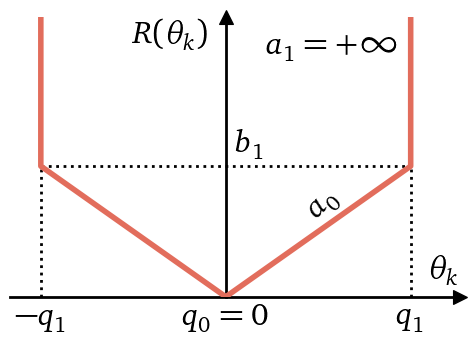

In [71]:
# Paramètres
q = [3]
b = [0.7]

fig, ax = plt.subplots(figsize=FIGSIZE)
setup_ax(ax, r"$\theta_k$",0.15)

# Tracé (symétrique)
w_vals = [0, q[0], q[0]]
b_vals = [0, b[0], b[0]+0.8]
ax.plot(w_vals, b_vals, c=c_reg, lw=2*linewidth, zorder=3)
ax.plot([-x for x in w_vals], b_vals, c=c_reg, lw=2*linewidth, zorder=3)
# Annotations
for i in range(1):
    ax.plot([q[i], q[i]], [0, b[i]], 'k:', lw=linewidth)
    ax.plot([-q[i], -q[i]], [0, b[i]], 'k:', lw=linewidth)
    ax.plot([-q[i], q[i]], [b[i], b[i]], 'k:', lw=linewidth)
    ax.text(q[i], -0.15, f'$q_{i+1}$', ha='center')
    ax.text(-q[i], -0.15, f'$-q_{i+1}$', ha='center')
    ax.text(0.15, b[i]+0.12, f'$b_{i+1}$', va='center')

ax.text(0.65, b[0]+0.6, r'$a_1 = +\infty$')
ax.text(q[0]/2-0.3, b[0]/2+0.15, r'$a_0$', va='center', rotation=45) # Label de pente
ax.text(0, -0.15, r"$q_0=0$", ha='center')

ax.text(-0.3, b[0]+0.7 , r'$R(\theta_k)$', ha='right', va='center')


ax.set_xlim(-3.5, 3.8)
ax.set_ylim(0, 1.5)

plt.subplots_adjust(LEFT, 0.15, RIGHT, TOP)
fig.savefig("regularizer.pdf", format="pdf")
plt.show()

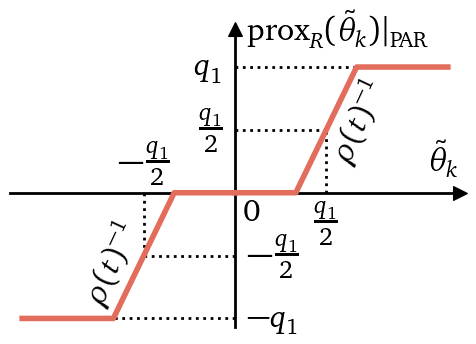

In [84]:
q = 3
beta = 0.5

fig, ax = plt.subplots(figsize=FIGSIZE)
setup_ax(ax, r'$\tilde{\theta}_k$', 0.63)

# Points de construction (u, y)
u_pts = [0, q/2 - beta, q/2 + beta, q, q+beta]
y_pts = [0, 0, q, q, q]

ax.plot(u_pts, y_pts, c=c_prox, lw=2*linewidth,zorder=3)
ax.plot([-x for x in u_pts], [-y for y in y_pts], c=c_prox, lw=2*linewidth, zorder=3)

# Labels sur l'axe X
tick_u = [-q/2]
labels = [r'$-\frac{q_1}{2}$']
for val, lab in zip(tick_u, labels):
    ax.text(val, 0.2, lab, ha='center', va='bottom',fontdict={'fontsize': FONTSIZE+3})
tick_u = [q/2]
labels = [r'$\frac{q_1}{2}$']
for val, lab in zip(tick_u, labels):
    ax.text(val, -0.2, lab, ha='center', va='top', fontdict={'fontsize': FONTSIZE+3})

ax.text(-0.2, q, r'$q_1$', ha='right', va='center')
ax.text(-0.2, q/2, r'$\frac{q_1}{2}$', ha='right', va='center',fontdict={'fontsize': FONTSIZE+3})
ax.text(0.2, -q, r'$-q_1$', ha='left', va='center')
ax.text(0.2, -q/2, r'$-\frac{q_1}{2}$', ha='left', va='center',fontdict={'fontsize': FONTSIZE+3})
ax.text(0.15, -0.1, "0",va='top')

# ax.plot([q, q], [0, q], 'k:', lw=0.8)
ax.plot([q/2, q/2], [0, q/2], 'k:', lw=linewidth)
ax.plot([0, q/2+beta], [q, q], 'k:', lw=linewidth)
ax.plot([0, q/2], [q/2, q/2], 'k:', lw=linewidth)
# ax.plot([-q, -q], [0, -q], 'k:', lw=0.8)
ax.plot([-q/2, -q/2], [0, -q/2], 'k:', lw=linewidth)
ax.plot([0, -q/2-beta], [-q, -q], 'k:', lw=linewidth)
ax.plot([0, -q/2], [-q/2, -q/2], 'k:', lw=linewidth)
ax.set_xlim(-q-beta-0.2, q+beta+0.2)
ax.set_ylim(-q-0.2, q+0.9)
ax.text(0.2, q+0.9, r'$\text{prox}_R (\tilde\theta_k)|_\text{PAR}$', ha='left', va='center')

ax.text(q/2+0.53, q/2+0.2, r'$\rho(t)^{-1}$', ha='center', va='center',fontdict={'fontsize': FONTSIZE-1}, rotation=65)
ax.text(-q/2-0.53, -q/2-0.2, r'$\rho(t)^{-1}$', ha='center', va='center',fontdict={'fontsize': FONTSIZE-1}, rotation=65)
plt.subplots_adjust(LEFT, BOTTOM, RIGHT, TOP-0.05)
fig.savefig("soft_prox_map.pdf", format="pdf")
plt.show()

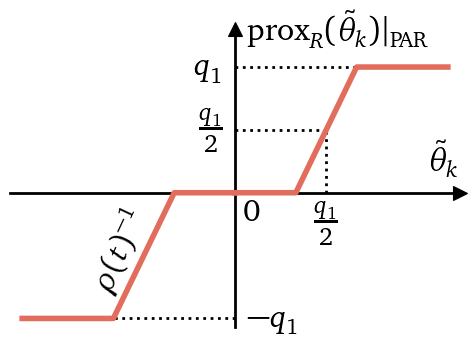

In [92]:
q = 3
beta = 0.5

fig, ax = plt.subplots(figsize=FIGSIZE)
setup_ax(ax, r'$\tilde{\theta}_k$', 0.63)

# Points de construction (u, y)
u_pts = [0, q/2 - beta, q/2 + beta, q, q+beta]
y_pts = [0, 0, q, q, q]

ax.plot(u_pts, y_pts, c=c_prox, lw=2*linewidth,zorder=3)
ax.plot([-x for x in u_pts], [-y for y in y_pts], c=c_prox, lw=2*linewidth, zorder=3)

tick_u = [q/2]
labels = [r'$\frac{q_1}{2}$']
for val, lab in zip(tick_u, labels):
    ax.text(val, -0.2, lab, ha='center', va='top', fontdict={'fontsize': FONTSIZE+3})

ax.text(-0.2, q, r'$q_1$', ha='right', va='center')
ax.text(-0.2, q/2, r'$\frac{q_1}{2}$', ha='right', va='center',fontdict={'fontsize': FONTSIZE+3})
ax.text(0.2, -q, r'$-q_1$', ha='left', va='center')
ax.text(0.15, -0.1, "0",va='top')

# ax.plot([q, q], [0, q], 'k:', lw=0.8)
ax.plot([q/2, q/2], [0, q/2], 'k:', lw=linewidth)
ax.plot([0, q/2+beta], [q, q], 'k:', lw=linewidth)
ax.plot([0, q/2], [q/2, q/2], 'k:', lw=linewidth)
# ax.plot([-q, -q], [0, -q], 'k:', lw=0.8)
ax.plot([0, -q/2-beta], [-q, -q], 'k:', lw=linewidth)
ax.set_xlim(-q-beta-0.2, q+beta+0.2)
ax.set_ylim(-q-0.2, q+0.9)
ax.text(0.2, q+0.9, r'$\text{prox}_R (\tilde\theta_k)|_\text{PAR}$', ha='left', va='center')

ax.text(-q/2-0.4, -q/2+0.1, r'$\rho(t)^{-1}$', ha='center', va='center',fontdict={'fontsize': FONTSIZE-1}, rotation=65)
plt.subplots_adjust(LEFT, BOTTOM, RIGHT, TOP-0.05)
fig.savefig("soft_prox_map2.pdf", format="pdf")
plt.show()

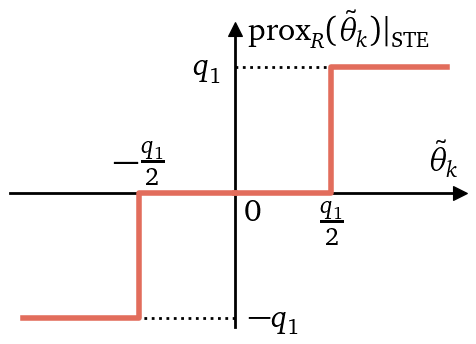

In [83]:
q = 3
beta = 0.3

fig, ax = plt.subplots(figsize=FIGSIZE)
setup_ax(ax, r'$\tilde{\theta}_k$', 0.63)

# Points de construction (u, y)
u_pts = [0, q/2, q/2, q+beta]
y_pts = [0, 0, q, q]

ax.plot(u_pts, y_pts, c=c_prox, lw=2*linewidth, zorder=3)
ax.plot([-x for x in u_pts], [-y for y in y_pts], c=c_prox, lw=2*linewidth, zorder=3)

# Labels sur l'axe X
ax.text(-q/2, 0.2, r'$-\frac{q_1}{2}$', ha='center', va='bottom',fontdict={'fontsize': FONTSIZE+3})
ax.text(q/2, -0.2, r'$\frac{q_1}{2}$', ha='center', va='top', fontdict={'fontsize': FONTSIZE+3})

ax.text(-0.2, q, r'$q_1$', ha='right', va='center')
ax.text(0.2, -q, r'$-q_1$', ha='left', va='center')
ax.text(0.15, -0.1, "0",va='top',ha='left')

# ax.plot([q, q], [0, q], 'k:', lw=0.8)
ax.plot([0, q/2], [q, q], 'k:', lw=linewidth)
# ax.plot([-q, -q], [0, -q], 'k:', lw=0.8)
ax.plot([0, -q/2], [-q, -q], 'k:', lw=linewidth)
ax.set_xlim(-q-0.5, q+0.5)
ax.set_ylim(-q-0.2, q+0.9)
ax.text(0.2, q+0.9, r'$\text{prox}_R (\tilde\theta_k)|_\text{STE}$', ha='left', va='center')
plt.subplots_adjust(LEFT, BOTTOM, RIGHT, TOP-0.05)
fig.savefig("hard_prox_map.pdf", format="pdf")
plt.show()